In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
file_path = '../data/data.csv'
df = pd.read_csv(file_path, parse_dates=['Date'])

df.head()

,Date,Inflation,CPI,Treasury_Yield,Open,High,Low,Close,SP500_Adj_Close,Volume,...,volatility,volatility_forcast,returns,EWMA_VM,GARCH_VM,EGARCH_VM,RogersSatchell_VM,garman_klass,parkinson,yang_zhang
0,2003-01-03,1.62,182.6,4.05,909.03,911.25,903.07,908.59,908.59,1130800000,...,0.9058,2.5512,-0.0005,0.0116,0.0002,0.0182,0.0069,0.0064,0.0054,0.0090
1,2003-01-06,1.63,182.6,4.09,908.59,931.77,908.59,929.01,929.01,1435900000,...,2.5512,1.1827,0.0222,0.0112,0.0003,0.0267,0.0086,0.0112,0.0151,0.0252
2,2003-01-07,1.62,182.6,4.04,929.01,930.81,919.93,922.93,922.93,1545200000,...,1.1827,1.6085,-0.0066,0.0122,0.0003,0.0376,0.0070,0.0072,0.0071,0.0118
3,2003-01-08,1.71,182.6,4.00,922.93,922.93,908.32,909.93,909.93,1467600000,...,1.6085,2.0199,-0.0142,0.0119,0.0004,0.0512,0.0053,0.0070,0.0096,0.0160
4,2003-01-09,1.78,182.6,4.19,909.93,928.31,909.93,927.57,927.57,1560300000,...,2.0199,1.6597,0.0192,0.0121,0.0004,0.0675,0.0040,0.0076,0.0120,0.0200


In [3]:
df.describe()


,Date,Inflation,CPI,Treasury_Yield,Open,High,Low,Close,SP500_Adj_Close,Volume,...,volatility,volatility_forcast,returns,EWMA_VM,GARCH_VM,EGARCH_VM,RogersSatchell_VM,garman_klass,parkinson,yang_zhang
count,5369,5369.000000,5369.000000,5369.000000,5369.000000,5369.000000,5369.000000,5369.000000,5369.000000,5.369000e+03,...,5369.000000,5369.000000,5369.000000,5369.000000,5369.000000,5369.000000,5369.000000,5369.000000,5369.000000,5369.000000
mean,2013-09-30 01:09:11.834606080,2.088299,235.393755,2.993492,2152.925995,2164.969175,2140.122122,2153.369180,2153.369180,3.637194e+09,...,1.235623,1.235567,0.000334,0.010071,0.000525,0.816745,0.006680,0.007014,0.007347,0.012590
min,2003-01-03 00:00:00,0.040000,182.600000,0.520000,679.280000,695.270000,666.790000,676.530000,676.530000,3.560700e+08,...,0.145700,0.145700,-0.127700,0.002900,0.000200,0.018200,0.000000,0.000900,0.000900,0.001700
25%,2008-05-16 00:00:00,1.830000,212.687000,2.060000,1234.480000,1242.819900,1226.640000,1234.370000,1234.370000,2.919900e+09,...,0.644000,0.644000,-0.004200,0.006400,0.000500,0.819600,0.003500,0.003900,0.003900,0.006700
50%,2013-09-30 00:00:00,2.190000,233.544000,2.880000,1697.730000,1705.520000,1693.110000,1698.060100,1698.060100,3.627780e+09,...,0.977100,0.977100,0.000700,0.008100,0.000500,0.819600,0.005300,0.005600,0.005800,0.010000
75%,2019-02-14 00:00:00,2.360000,253.319000,4.010000,2816.450000,2833.030000,2800.919900,2818.370100,2818.370100,4.278890e+09,...,1.487400,1.487400,0.005700,0.011800,0.000500,0.819600,0.008100,0.008400,0.008900,0.015100
max,2024-06-28 00:00:00,3.020000,313.225000,5.260000,5499.990200,5523.640100,5471.319800,5487.029800,5487.029800,1.145623e+10,...,11.520800,11.520800,0.104200,0.053400,0.002200,0.819600,0.080000,0.076900,0.065500,0.136500
std,NaN,0.404915,32.942775,1.132520,1168.962423,1174.699201,1162.863101,1169.227053,1169.227053,1.358054e+09,...,0.985467,0.985494,0.011954,0.006473,0.000092,0.038894,0.005583,0.005348,0.005750,0.009914


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                5369 non-null   datetime64[ns]
 1   Inflation           5369 non-null   float64       
 2   CPI                 5369 non-null   float64       
 3   Treasury_Yield      5369 non-null   float64       
 4   Open                5369 non-null   float64       
 5   High                5369 non-null   float64       
 6   Low                 5369 non-null   float64       
 7   Close               5369 non-null   float64       
 8   SP500_Adj_Close     5369 non-null   float64       
 9   Volume              5369 non-null   int64         
 10  GDP                 5369 non-null   float64       
 11  mortage             5369 non-null   float64       
 12  unemployement       5369 non-null   float64       
 13  fed_fund_rate       5369 non-null   float64     

                                Date   volatility
count                           5369  5369.000000
mean   2013-09-30 01:09:11.834606080     1.235623
min              2003-01-03 00:00:00     0.145700
25%              2008-05-16 00:00:00     0.644000
50%              2013-09-30 00:00:00     0.977100
75%              2019-02-14 00:00:00     1.487400
max              2024-06-28 00:00:00    11.520800
std                              NaN     0.985467


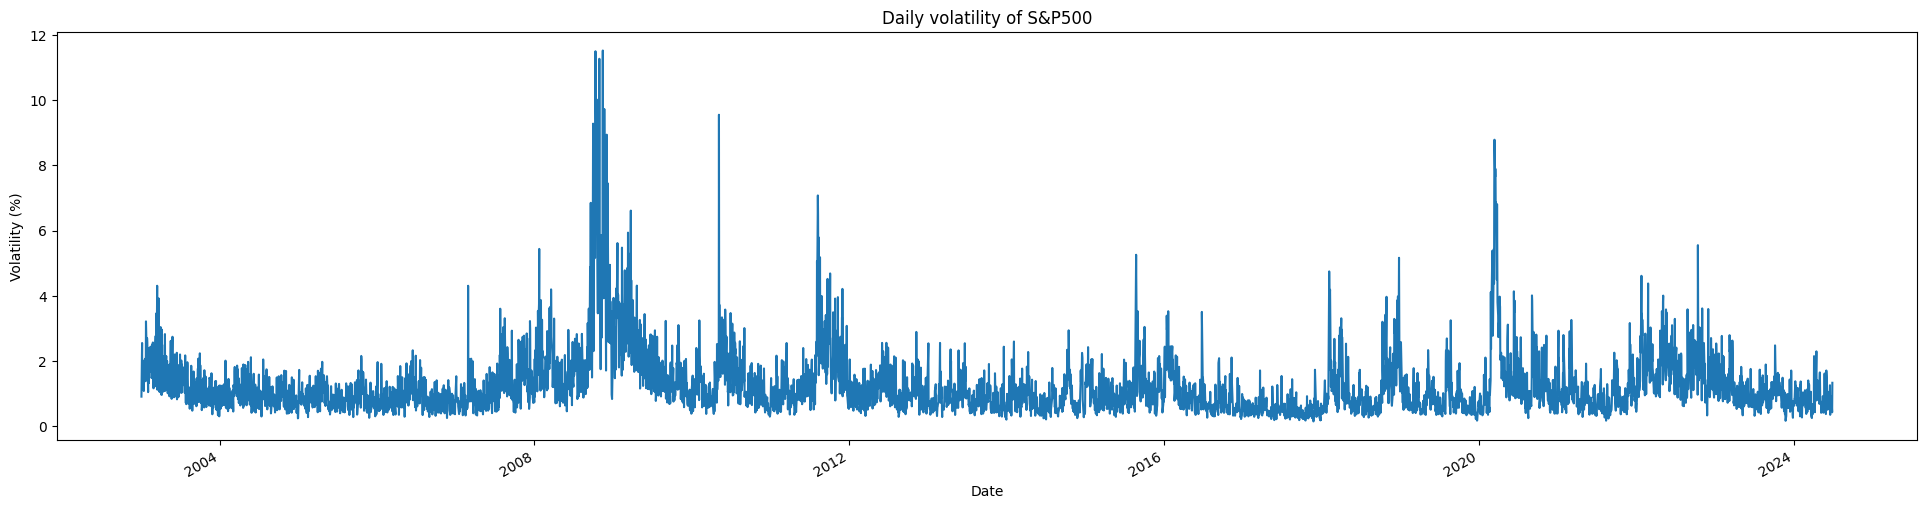

In [5]:
print(df[['Date', 'volatility']].describe())

df.set_index('Date')['volatility'].plot(figsize=(24, 6))
plt.title("Daily volatility of S&P500")
plt.xlabel("Date")
plt.ylabel("Volatility (%)")
plt.show()

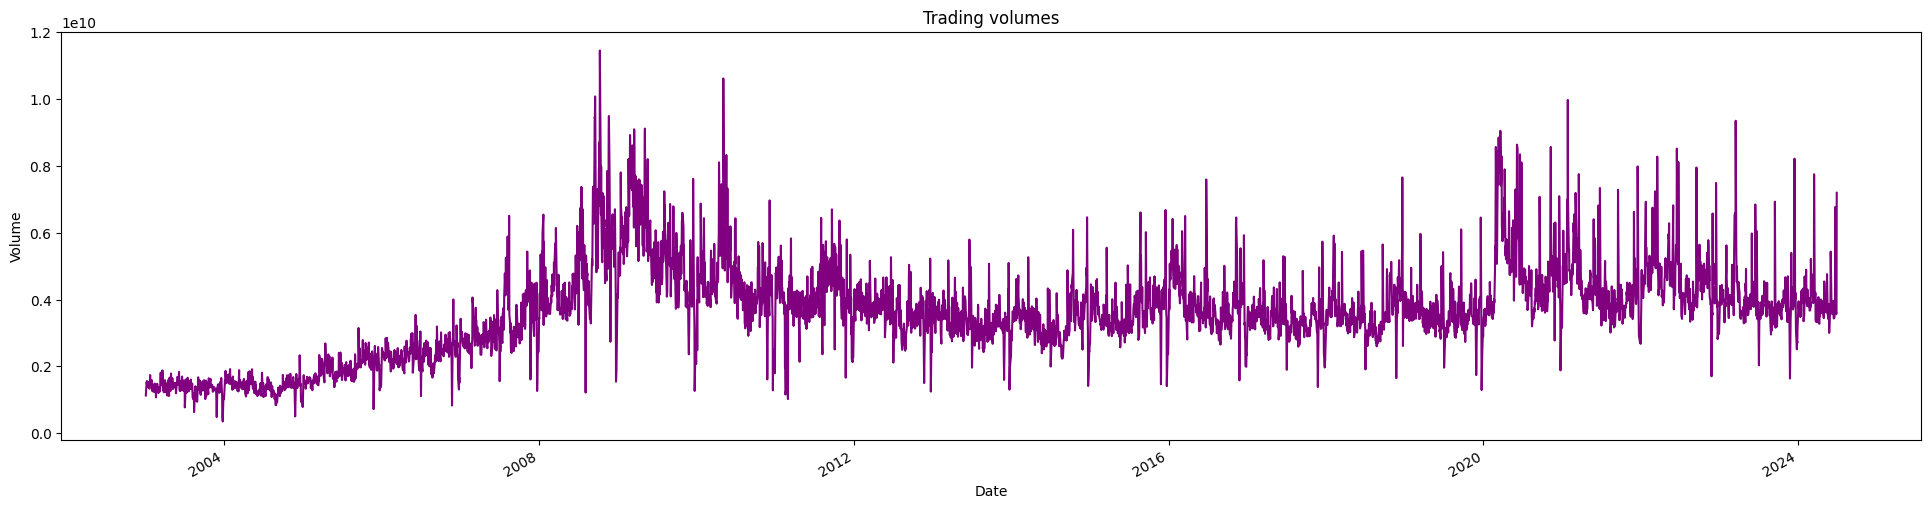

In [6]:
df.set_index('Date')['Volume'].plot(figsize=(24, 6), color='purple')
plt.title("Trading volumes")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()


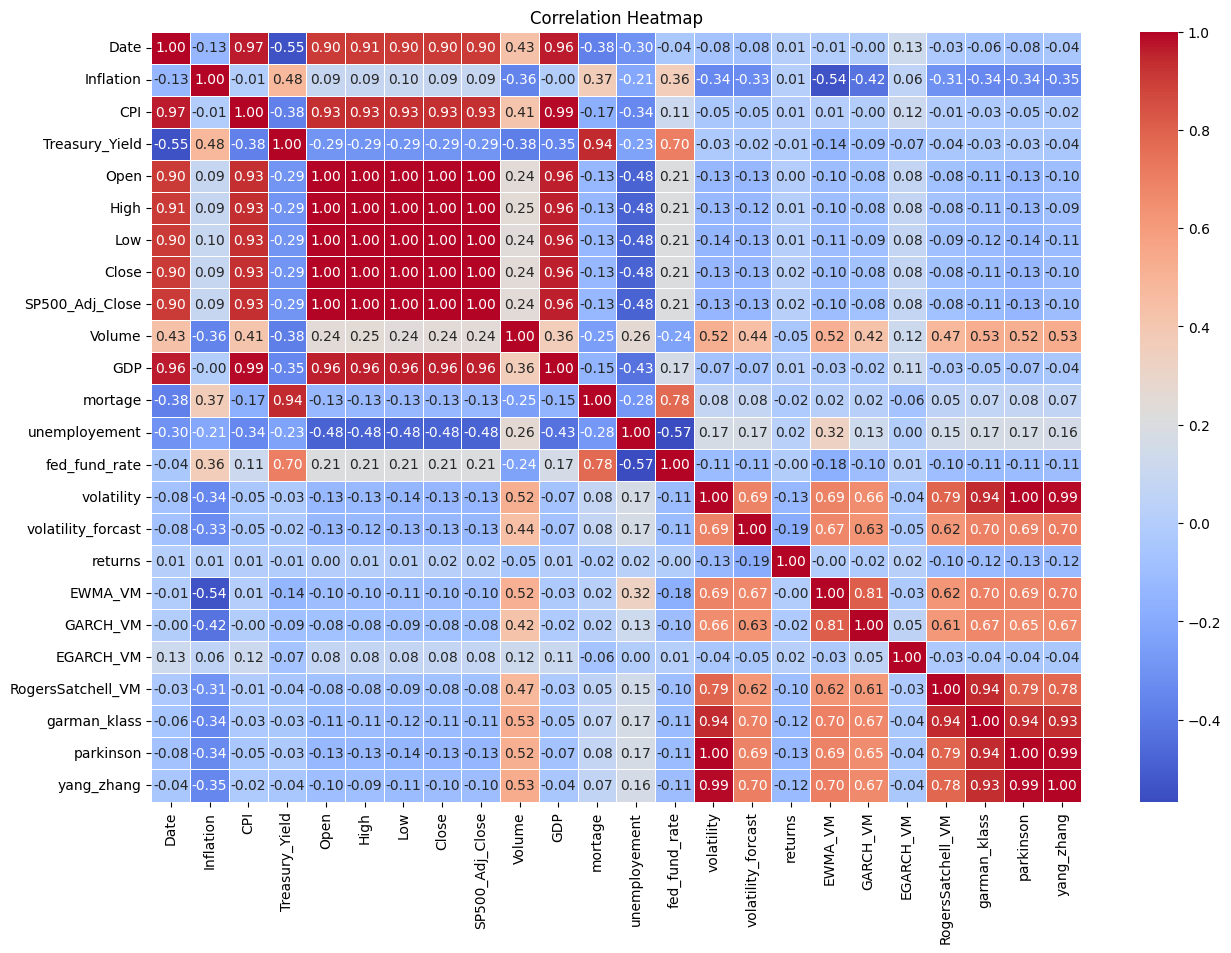

In [7]:
correlation_matrix = df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap")

plt.show()

C:\Users\paula\AppData\Local\Temp\ipykernel_4752\2922925087.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['volatility_forcast'], shade=True)


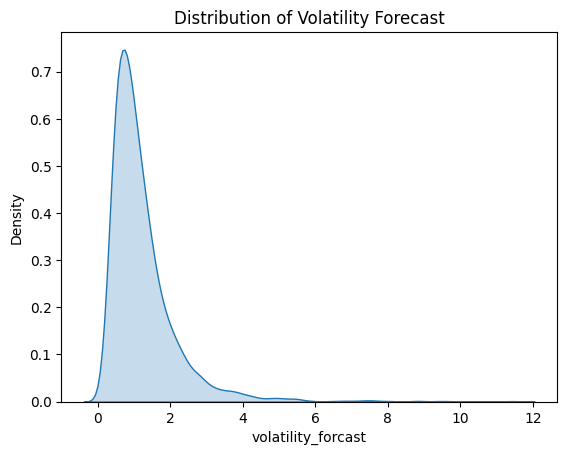

In [8]:
sns.kdeplot(df['volatility_forcast'], shade=True)
plt.title('Distribution of Volatility Forecast')
plt.show()


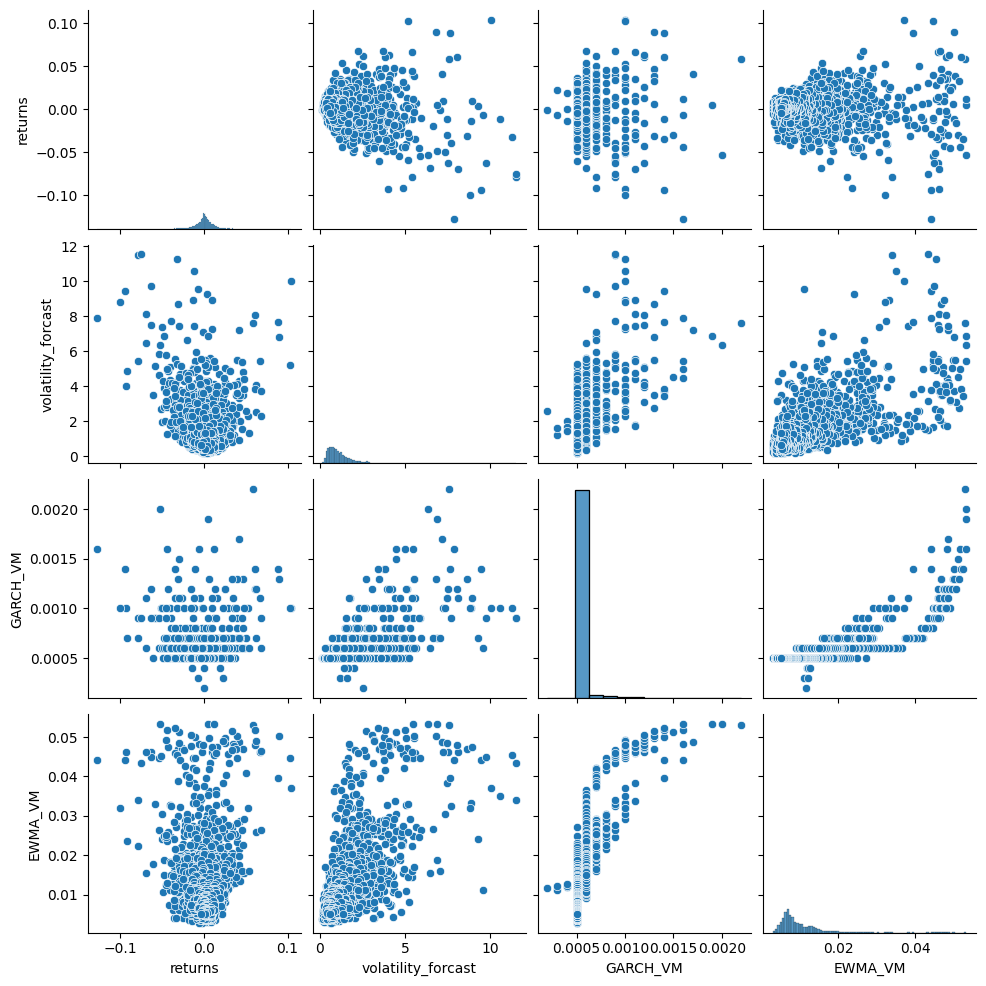

In [9]:
sns.pairplot(df[['returns', 'volatility_forcast', 'GARCH_VM', 'EWMA_VM']])
plt.show()


In [10]:
from sklearn.preprocessing import StandardScaler

# Extract features and target
X = df.drop(['Date', 'volatility_forcast'], axis=1)
y = df['volatility_forcast']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


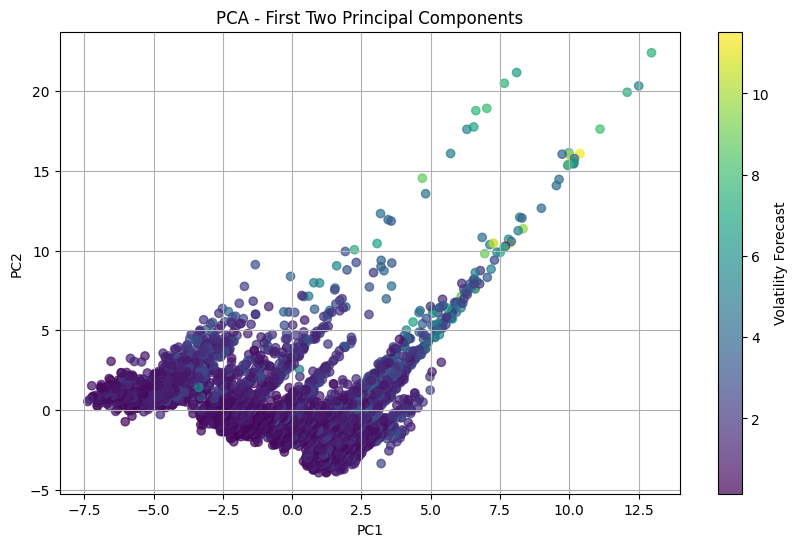

  Principal Component  Explained Variance Ratio
0                 PC1                  0.344780
1                 PC2                  0.284744


In [11]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(label='Volatility Forecast')
plt.title('PCA - First Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()

# Explain variance ratio
explained_variance = pd.DataFrame(
    {'Principal Component': [f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))],
     'Explained Variance Ratio': pca.explained_variance_ratio_}
)
print(explained_variance)


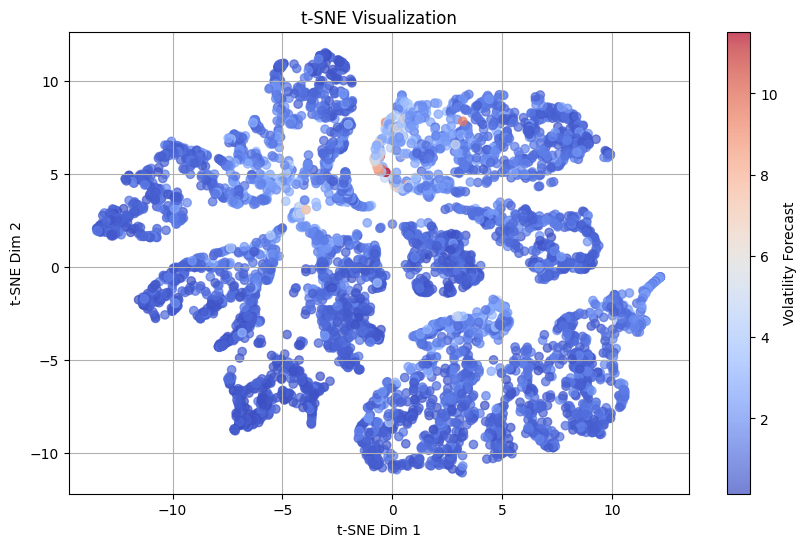

In [12]:
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
X_tsne = tsne.fit_transform(X_scaled)

# Visualize t-SNE results
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Volatility Forecast')
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Dim 1')
plt.ylabel('t-SNE Dim 2')
plt.grid()
plt.show()


c:\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


c:\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


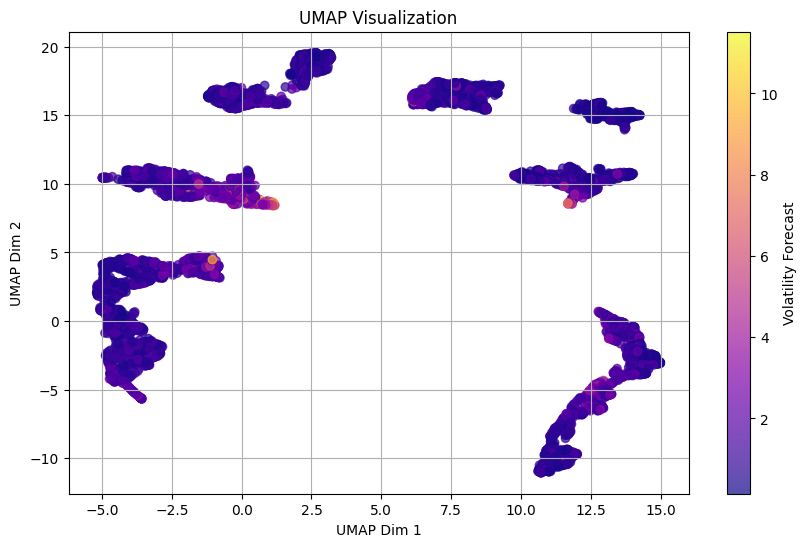

In [13]:
import umap

# Apply UMAP
umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = umap_reducer.fit_transform(X_scaled)

# Visualize UMAP results
plt.figure(figsize=(10, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='plasma', alpha=0.7)
plt.colorbar(label='Volatility Forecast')
plt.title('UMAP Visualization')
plt.xlabel('UMAP Dim 1')
plt.ylabel('UMAP Dim 2')
plt.grid()
plt.show()


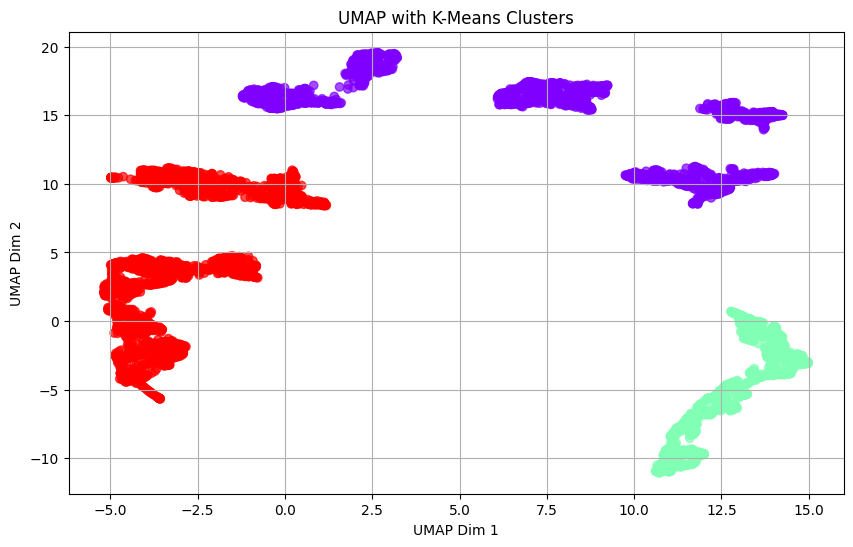

In [14]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_umap)

plt.figure(figsize=(10, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=clusters, cmap='rainbow', alpha=0.7)
plt.title('UMAP with K-Means Clusters')
plt.xlabel('UMAP Dim 1')
plt.ylabel('UMAP Dim 2')
plt.grid()
plt.show()


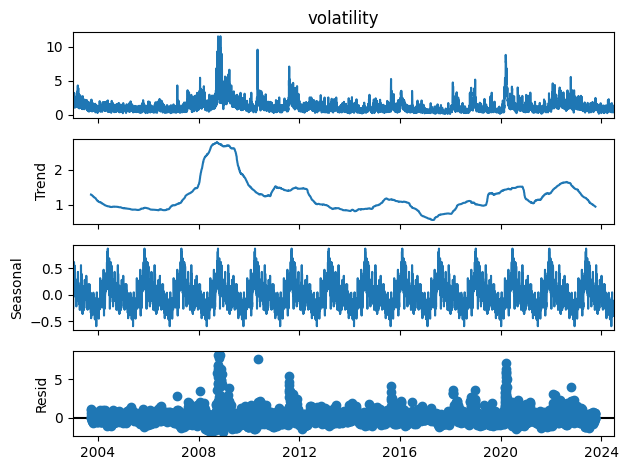

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df.set_index('Date')['volatility'], model='additive', period=365)
decomposition.plot()
plt.show()


In [16]:
# TO BE CONTINUE